Title: Regression Models

Polynomial Regression

Task 1: Apply polynomial regression to a dataset showing the relationship between age and income.

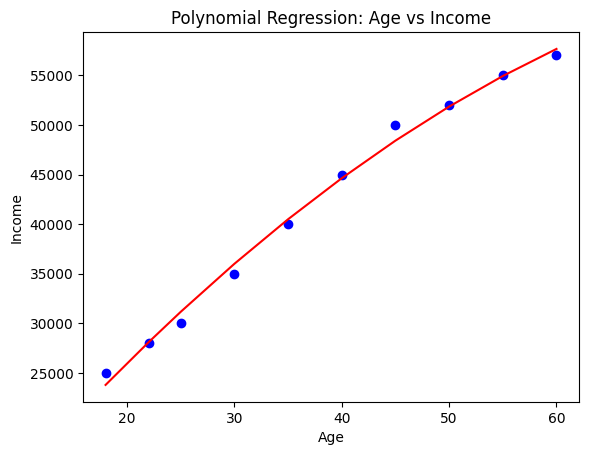

Predictions on Test Data (Income): [54924.83832797 28092.92315869]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Task 1: Apply polynomial regression to a dataset showing the relationship between age and income

# Sample data: Age and corresponding Income
data = {
    'Age': [18, 22, 25, 30, 35, 40, 45, 50, 55, 60],
        'Income': [25000, 28000, 30000, 35000, 40000, 45000, 50000, 52000, 55000, 57000]
        }

# Convert to numpy arrays for better processing
X = np.array(data['Age']).reshape(-1, 1)
y = np.array(data['Income'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

# Create a linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)
# Visualizing the polynomial regression result
plt.scatter(X, y, color='blue')  # original data points
plt.plot(X, model.predict(poly.transform(X)), color='red')  # polynomial regression curve
plt.title('Polynomial Regression: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Print predictions on test data
print("Predictions on Test Data (Income):", y_pred)

Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

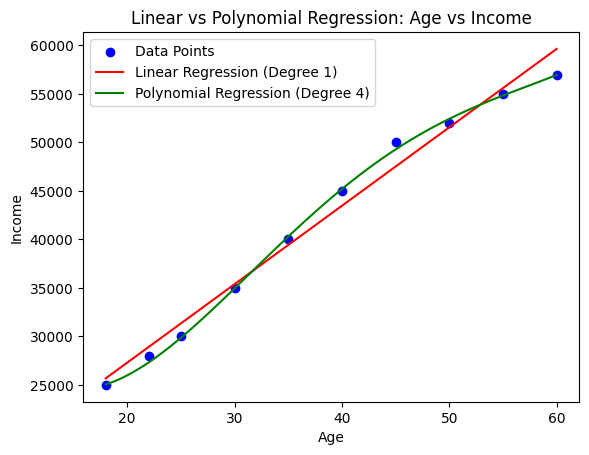

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Task 2: Explore and visualize a higher-degree polynomial fitting compared to a simple linear regression.

# Sample data: Age and corresponding Income
data = {
    'Age': [18, 22, 25, 30, 35, 40, 45, 50, 55, 60],
        'Income': [25000, 28000, 30000, 35000, 40000, 45000, 50000, 52000, 55000, 57000]
        }

# Convert to numpy arrays for better processing
X = np.array(data['Age']).reshape(-1, 1)
y = np.array(data['Income'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression (degree 4 for higher-degree polynomial fitting)
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Visualization of Linear Regression vs Polynomial Regression
plt.scatter(X, y, color='blue', label='Data Points')  # Original data points

# Plotting Linear Regression
plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression (Degree 1)')

# Plotting Polynomial Regression (Degree 4)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_range, poly_model.predict(poly.transform(X_range)), color='green', label='Polynomial Regression (Degree 4)')

plt.title('Linear vs Polynomial Regression: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

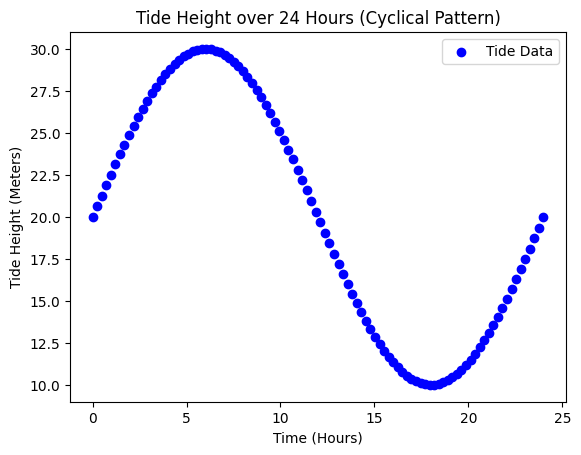

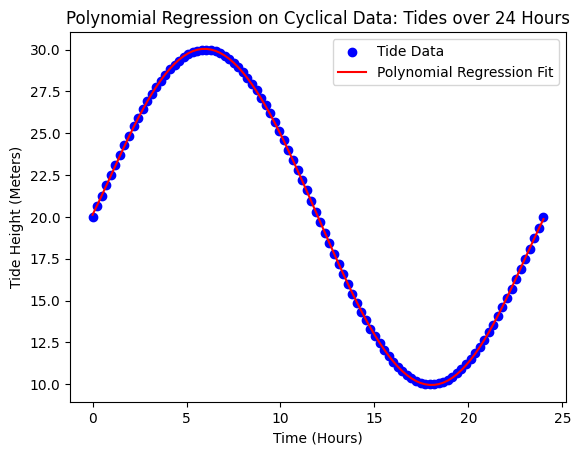

Predicted tide heights at different times: [20.12867912 20.69166106 21.27103364 21.86119931 22.45688925 23.05315643
 23.64536873 24.22920198 24.80063304 25.35593292]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Task 3: Dataset with cyclical patterns such as tides or circadian cycles.

# Generate synthetic data with cyclical pattern (e.g., tides)
# We will simulate a sine wave representing tide heights over time (e.g., 24-hour cycle)
time = np.linspace(0, 24, 100)  # Time from 0 to 24 hours
tide_height = 10 * np.sin(time * (2 * np.pi / 24)) + 20  # Sine wave with a period of 24 hours

# Visualizing the cyclical data (Tides over 24 hours)
plt.scatter(time, tide_height, color='blue', label='Tide Data')
plt.title('Tide Height over 24 Hours (Cyclical Pattern)')
plt.xlabel('Time (Hours)')
plt.ylabel('Tide Height (Meters)')
plt.legend()
plt.show()

# Polynomial Regression for cyclical pattern
# Since the pattern is cyclical, we might not be able to fit it with a simple linear model.
# Let's use a higher-degree polynomial regression to capture the cyclical pattern.
poly = PolynomialFeatures(degree=5)  # Higher-degree polynomial to fit the curve
X_poly = poly.fit_transform(time.reshape(-1, 1))

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, tide_height)

# Predict the tide height over the 24-hour cycle using the polynomial model
tide_pred = model.predict(X_poly)

# Visualize the polynomial regression fit on cyclical data
plt.scatter(time, tide_height, color='blue', label='Tide Data')  # Original data points
plt.plot(time, tide_pred, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression on Cyclical Data: Tides over 24 Hours')
plt.xlabel('Time (Hours)')
plt.ylabel('Tide Height (Meters)')
plt.legend()
plt.show()

# Print some predictions to show the model output
print("Predicted tide heights at different times:", tide_pred[:10])  # Print first 10 predictions
